In [29]:
import matplotlib.pyplot as plt
plt.style.use('default')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report


In [30]:
df = pd.read_csv('./datasets/spam_ham_dataset.csv')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


# Classificação

In [31]:
# 1. Retirar dados do dataframe
textos = list(df['text'])
labels = list(df['label'])

# 2. Vetorizar
vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(textos)

In [32]:
# 3. Divisão entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, labels, random_state=37)

In [33]:
# 4. Treinamento e teste do modelo
model = BernoulliNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.85      0.98      0.91       914
        spam       0.92      0.57      0.70       379

    accuracy                           0.86      1293
   macro avg       0.88      0.78      0.81      1293
weighted avg       0.87      0.86      0.85      1293



## Abrindo o modelo

In [37]:
# (a) Qual é o conteúdo de "vectorizer.vocabulary_"?
vocab = vectorizer.vocabulary_
#print(vocab)

In [45]:
# Probabilidades
palavras_ham = []
palavras_spam = []
for t in vocab.keys():
    prob_ham = model.feature_log_prob_[0, vocab[t]]
    palavras_ham.append( (prob_ham, t) )
    prob_spam = model.feature_log_prob_[1, vocab[t]]
    palavras_spam.append( (prob_spam, t) )


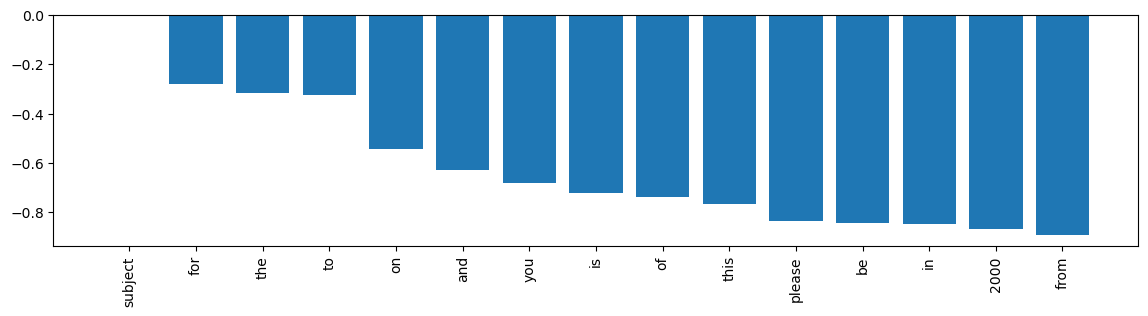

In [44]:
# Plot das probabilidades
# Mostrando num gráfico
tuplas_ordenadas = sorted(palavras_ham, reverse=True) # reverse=True pede uma ordenação em ordem decrescente
palavras = [ t[1] for t in tuplas_ordenadas ]
contagens = [ t[0] for t in tuplas_ordenadas ]

n_palavras = 15
eixo_x = np.arange(n_palavras)
plt.figure(figsize=(14,3))
plt.bar(eixo_x[0:n_palavras], contagens[0:n_palavras])
plt.xticks(eixo_x[0:n_palavras], palavras[0:n_palavras], rotation=90)
plt.show()

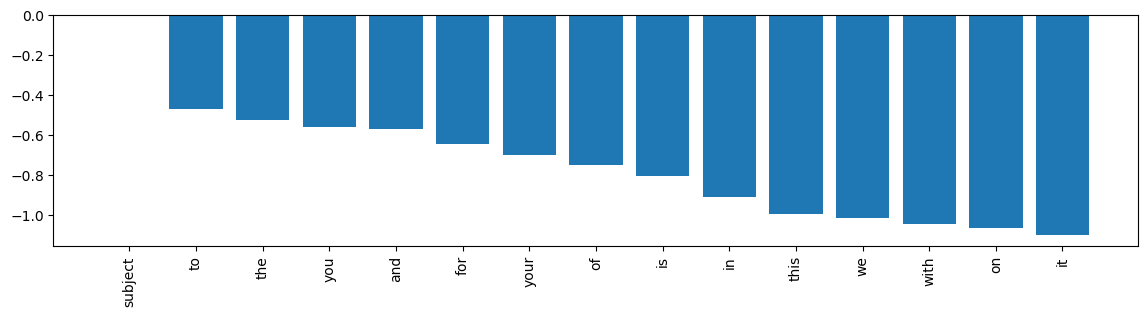

In [46]:
# Plot das probabilidades
# Mostrando num gráfico
tuplas_ordenadas = sorted(palavras_spam, reverse=True) # reverse=True pede uma ordenação em ordem decrescente
palavras = [ t[1] for t in tuplas_ordenadas ]
contagens = [ t[0] for t in tuplas_ordenadas ]

n_palavras = 15
eixo_x = np.arange(n_palavras)
plt.figure(figsize=(14,3))
plt.bar(eixo_x[0:n_palavras], contagens[0:n_palavras])
plt.xticks(eixo_x[0:n_palavras], palavras[0:n_palavras], rotation=90)
plt.show()